In [5]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from TrackReconstruction_functions import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 
import plotly.express as px
import plotly.io as pio


In [55]:
# diff = "nodiff"
diff = "5percent"

nubb_meta = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_1bar_{diff}_reco.h5", "meta")

display(nubb_meta)


Tl_meta = pd.DataFrame()
# Tl_meta = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_1bar_{diff}_reco.h5", "meta")
Bi_meta = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_1bar_{diff}_reco.h5", "meta")

Tl_meta = pd.concat([Tl_meta, Bi_meta])

display(Tl_meta)

Tl = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_1bar_{diff}_reco.h5", "data")
Tl_true_hits = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_1bar_nexus_filtered.h5", "MC/hits")
Tl_true_hits["z"] =Tl_true_hits["z"]+3000
Tl_true_parts = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_1bar_nexus_filtered.h5", "MC/particles")

# Load the dictionary back from the pickle file (binary mode)
with open(f"../data/Trackreco/ATPC_Bi_1bar_{diff}_trackreco.pkl", 'rb') as pickle_file:  # Use 'rb' for reading in binary
    Tracks_Tl      = pickle.load(pickle_file)
    connections_Tl = pickle.load(pickle_file)
    connection_counts_Tl = pickle.load(pickle_file)




,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,TortuosityA1,TortuosityA2,Squiglicity1,Squiglicity2,SquiglicityA1,SquiglicityA2,label
0,150,0,1,24,185,3464.721,2.464178,0.551725,0.385958,0.760964,0.602490,3.470056,2.035707,635.967496,409.119741,2.388284e+00,1.967882e+00,4.364851e+02,4.032777e+02,Primary
0,151,0,1,169,90,3385.803,2.306095,0.625598,0.503768,0.543012,0.514399,1.446712,4.052653,275.307359,813.979476,1.000880e+00,1.891861e+00,1.971567e+02,3.880520e+02,Primary
0,151,1,0,176,176,0.000,0.034404,0.034404,0.034404,0.034404,0.034404,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Brem
0,151,2,0,165,166,25.271,0.118048,0.118048,0.118048,0.118048,0.118048,1.666797,1.666797,42.122346,42.122346,8.881619e-01,8.881619e-01,2.244512e+01,2.244512e+01,Brem
0,152,0,1,103,11,3650.874,2.450860,0.598870,0.586332,0.509041,0.528771,1.807458,2.809599,317.289587,505.619299,1.344896e+00,1.867816e+00,2.379893e+02,3.504094e+02,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1558,1,0,68,67,72.804,0.204237,0.204237,0.204237,0.000000,0.204237,1.431425,1.431425,52.426959,52.426959,5.593600e-01,5.593600e-01,2.048696e+01,2.048696e+01,Delta0
0,1558,2,0,77,75,182.268,0.062583,0.062583,0.062583,0.000000,0.062583,1.000000,1.000000,85.440886,85.440886,1.029076e-16,1.029076e-16,8.792518e-15,8.792518e-15,Delta0
0,1559,0,1,91,59,2588.656,1.693013,0.515596,0.405231,0.428313,0.405231,3.103804,1.924429,649.378884,372.623811,2.204401e+00,1.427288e+00,4.669883e+02,2.818691e+02,Primary
0,1559,1,0,72,71,48.748,0.088691,0.088691,0.088691,0.000000,0.088691,1.266600,1.266600,31.292405,31.292405,4.719646e-01,4.719646e-01,1.166027e+01,1.166027e+01,Delta0


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,TortuosityA1,TortuosityA2,Squiglicity1,Squiglicity2,SquiglicityA1,SquiglicityA2,label
0,50650000,0,1,14,217,3894.863,2.359119,0.588720,0.254996,0.666575,0.114809,4.943665,1.083615,949.484811,205.194709,3.371735,0.418028,646.313531,81.698508,Primary
0,50650000,1,0,0,2,96.253,0.102306,0.102306,0.102306,0.102306,0.102306,1.017470,1.017470,97.934302,97.934302,0.051538,0.051538,4.960677,4.960677,Brem
0,50650001,0,1,74,112,3120.244,2.044825,0.606171,0.286090,0.528181,0.157319,2.783426,1.109923,562.003217,192.460582,2.280027,0.355517,469.918966,60.681176,Primary
0,50650001,1,0,0,0,0.000,0.031639,0.031639,0.031639,0.031639,0.031639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem
0,50650001,2,0,1,1,0.000,0.039323,0.039323,0.039323,0.039323,0.039323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1100058,0,1,129,79,3265.576,2.116349,0.638492,0.230721,0.702199,0.101602,2.017797,1.053297,395.423116,181.374215,1.563474,0.384636,306.144455,64.451233,Primary
0,1100058,1,0,6,6,0.000,0.020781,0.020781,0.020781,0.020781,0.020781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem
0,1100058,2,0,0,3,148.024,0.317029,0.317029,0.317029,0.317029,0.317029,1.821919,1.821919,269.687901,269.687901,1.395234,1.395234,206.528330,206.528330,Brem
0,1100059,0,1,79,118,2427.008,1.823292,0.643290,0.205901,0.579212,0.099813,1.904947,1.069487,351.364817,177.632270,1.307823,0.431067,249.965418,69.876276,Primary


In [7]:
nubb_events = len(nubb_meta.event_id.unique())
Tl_events = len(Tl_meta.event_id.unique())

print(nubb_events)
print(Tl_events)

166316
177477


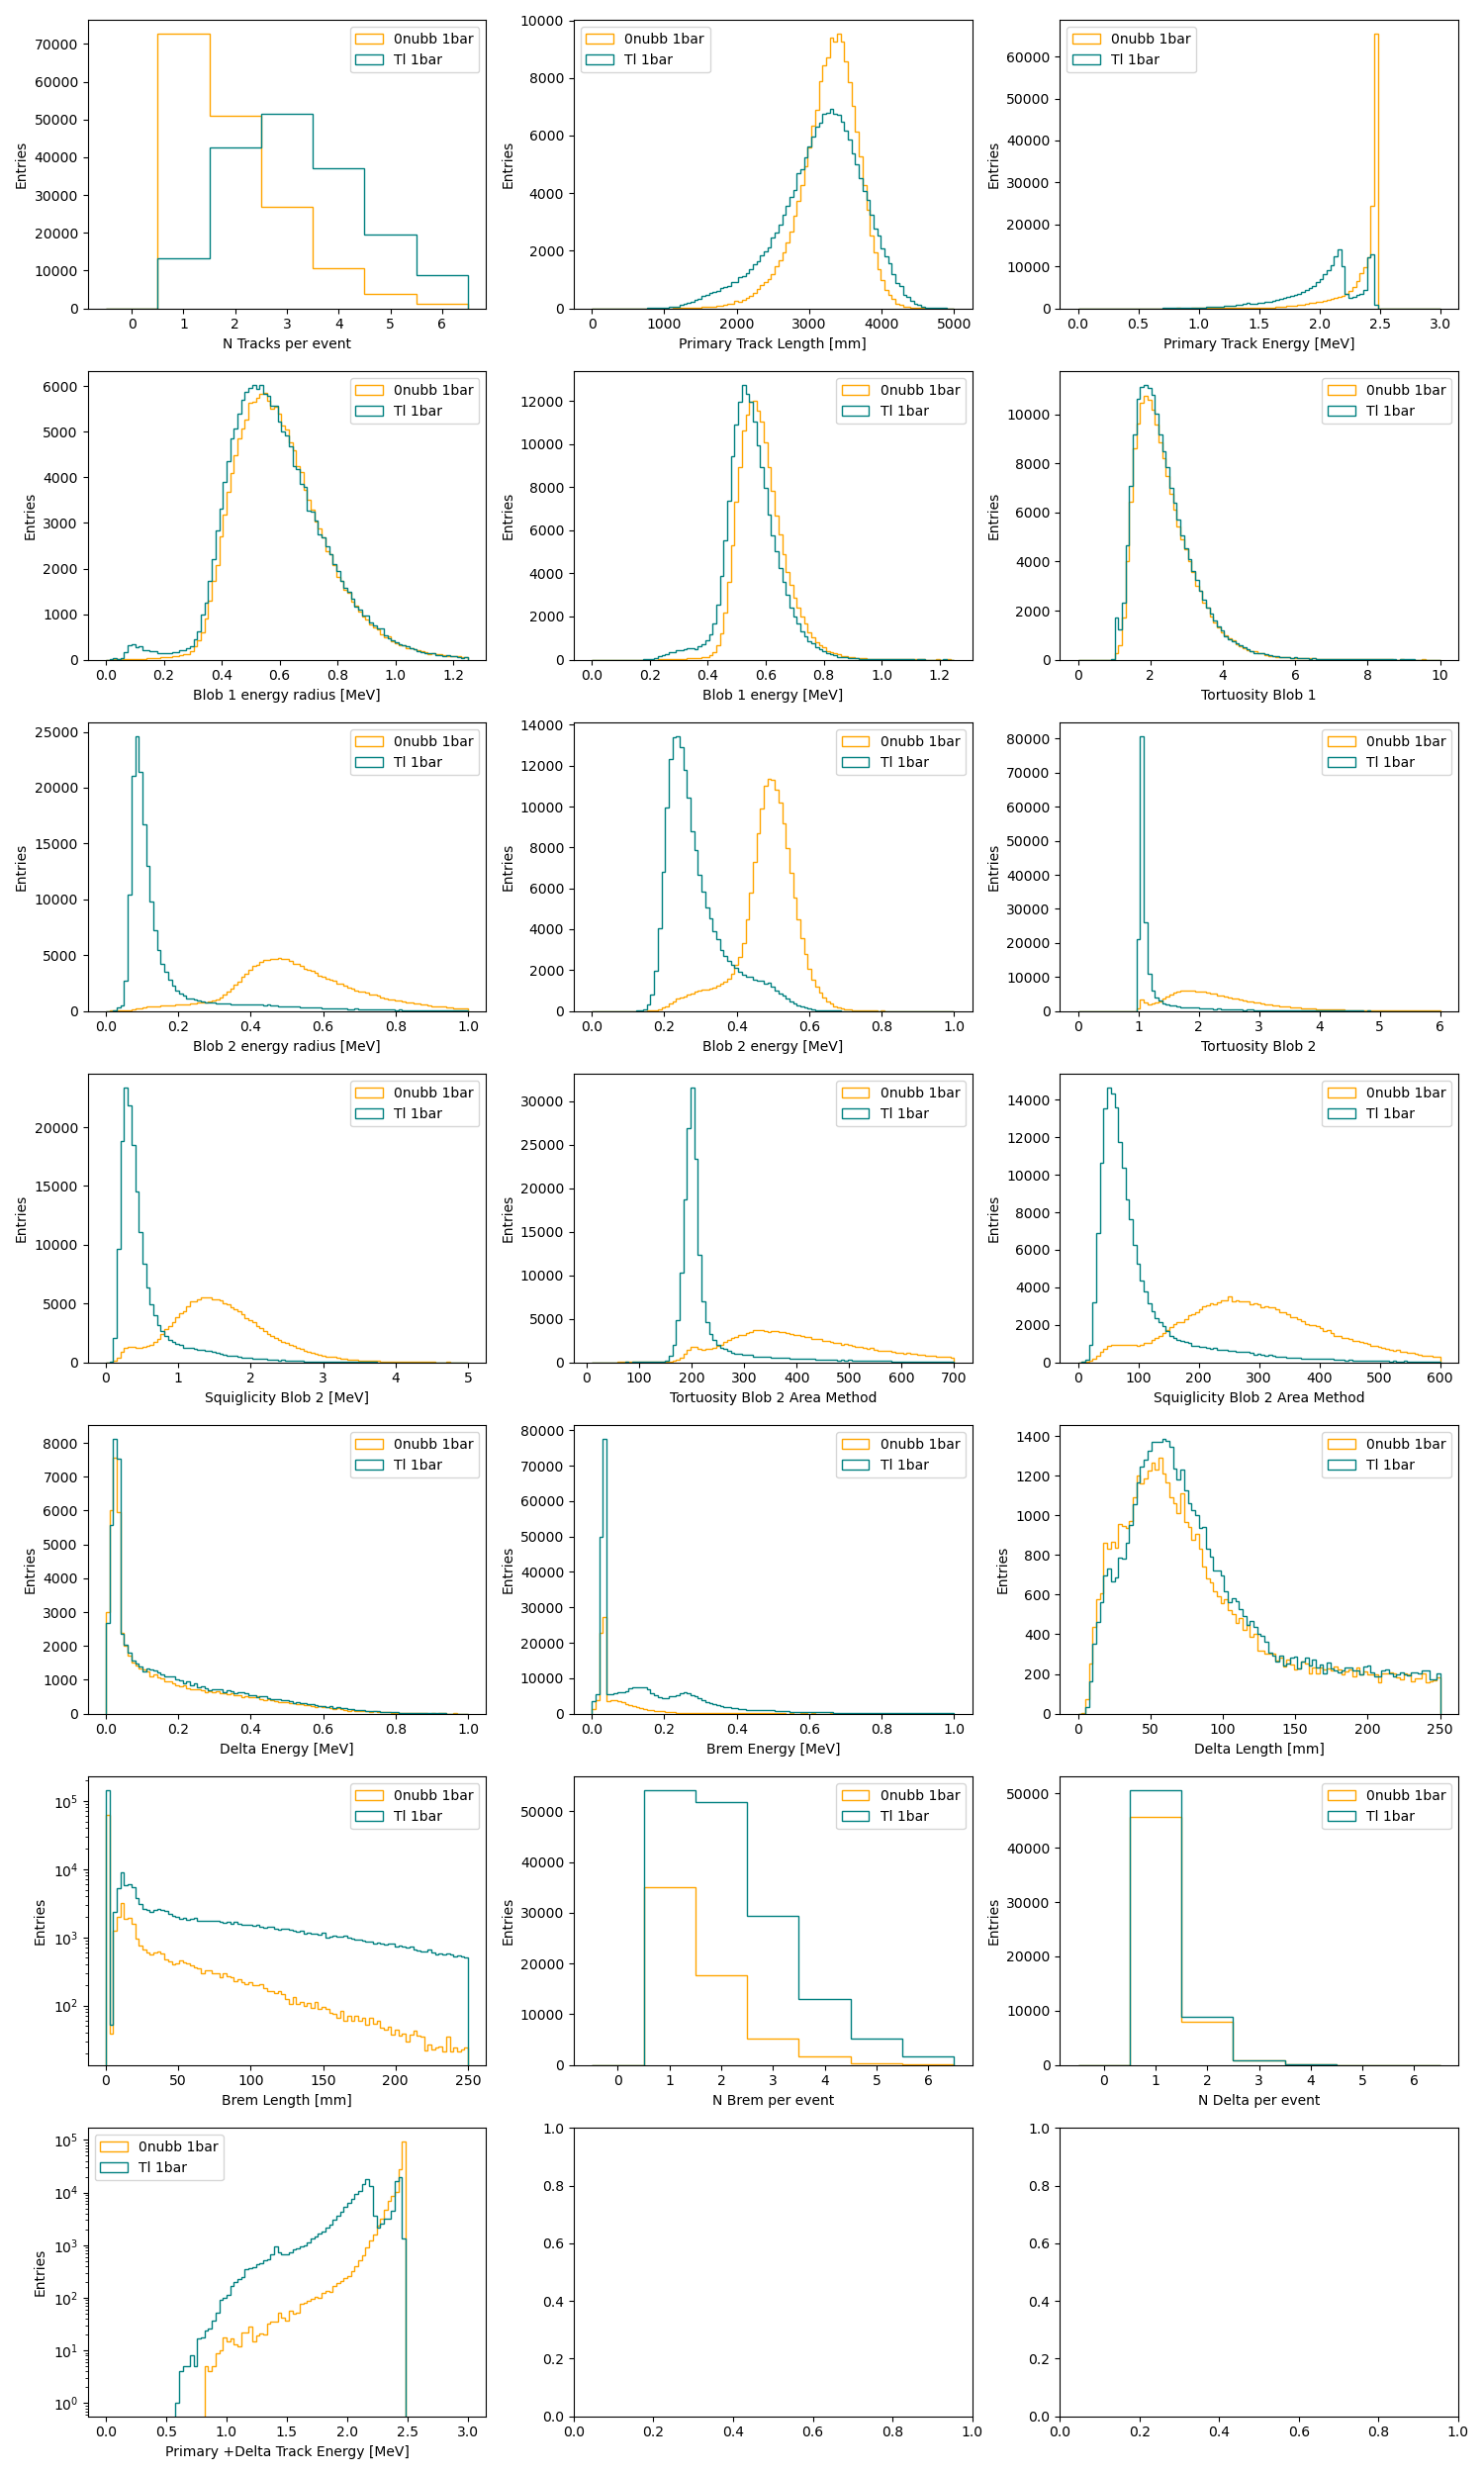

In [11]:
# Plot some variables like number of tracks
%matplotlib widget

def GetNLongTracks(df_meta):

    # Set threshold for cumulative_distance
    threshold = 0

    # Step 1: Filter rows based on cumulative_distance
    filtered_df = df_meta[df_meta["length"] >= threshold]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": "N_tracks"}, inplace=True)

    return trk_counts


def GetNParticles(df_meta, label):
    # Set threshold for cumulative_distance
    threshold = 0

    # Filter events with brem in the name
    filtered_df = df_meta[df_meta["label"].str.contains(label, na=False)]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": f"N_{label}"}, inplace=True)

    return trk_counts


def GetDeltas(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Delta", na=False)]

    return filtered_df

def GetBrems(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Brem", na=False)]

    return filtered_df

# Gets the sum of the primary track and the delta energies
def GetTrackDeltaEnergy(df_meta):
    # Filter events with brem in the name
    filtered_df = df_meta[ ~df_meta["label"].str.contains("Brem", na=False)]
    filtered_df =filtered_df[filtered_df.energy>0.01]
    trk_energies = filtered_df.groupby(["event_id"])["energy"].sum()
    return trk_energies.values


def PlotDistributions(df_meta, col, label, scale_factor):

    df_counts = GetNLongTracks(df_meta)
    df_counts_evts = df_counts[df_counts.N_tracks >= 1].event_id.unique()

    # Number of brems and deltas
    N_brem = GetNParticles(df_meta, "Brem")
    N_delta = GetNParticles(df_meta, "Delta")

    # Dataframes containing brems and deltas
    deltas = GetDeltas(df_meta)
    brems  = GetBrems(df_meta)

    # This is the sum of the primary and delta energies attached to it
    trk_e = GetTrackDeltaEnergy(df_meta)

    bin_edges = np.arange(-0.5, 7.5, 1)
    bin_centers = np.arange(0, 7, 1)

    weights = np.ones_like(df_counts) * scale_factor

    # Multiplicities
    axs[0,0].hist(df_counts.N_tracks, bins = bin_edges, histtype="step", color = col, label = label);
    # axs[0,0].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[0,0].set_xlabel("N Tracks per event")
    axs[0,0].set_ylabel("Entries")
    axs[0,0].set_xticks(bin_centers) ;
    axs[0,0].legend()


    df_primary = df_meta[df_meta.primary == 1]

    weights = np.ones_like(df_primary.energy) * scale_factor

    axs[0,1].hist(df_primary.length, bins = np.linspace(0, 5000, 100), histtype="step", color = col, label = label, weights = weights);
    axs[0,1].set_xlabel("Primary Track Length [mm]")
    axs[0,1].set_ylabel("Entries")
    axs[0,1].legend()

    axs[0,2].hist(df_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[0,2].set_xlabel("Primary Track Energy [MeV]")
    axs[0,2].set_ylabel("Entries")
    axs[0,2].legend()

    axs[1,1].hist(df_primary.blob1, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,1].set_xlabel("Blob 1 energy [MeV]")
    axs[1,1].set_ylabel("Entries")
    axs[1,1].legend()

    axs[2,1].hist(df_primary.blob2, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,1].set_xlabel("Blob 2 energy [MeV]")
    axs[2,1].set_ylabel("Entries")
    axs[2,1].legend()

    axs[1,0].hist(df_primary.blob1R, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,0].set_xlabel("Blob 1 energy radius [MeV]")
    axs[1,0].set_ylabel("Entries")
    axs[1,0].legend()

    axs[2,0].hist(df_primary.blob2R, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,0].set_xlabel("Blob 2 energy radius [MeV]")
    axs[2,0].set_ylabel("Entries")
    axs[2,0].legend()

    axs[1,2].hist(df_primary.Tortuosity1, bins = np.linspace(0, 10, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,2].set_xlabel("Tortuosity Blob 1")
    axs[1,2].set_ylabel("Entries")
    axs[1,2].legend()

    axs[2,2].hist(df_primary.Tortuosity2, bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,2].set_xlabel("Tortuosity Blob 2")
    axs[2,2].set_ylabel("Entries")
    axs[2,2].legend()

    axs[3,0].hist(df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,0].set_xlabel("Squiglicity Blob 2 [MeV]")
    axs[3,0].set_ylabel("Entries")
    axs[3,0].legend()

    axs[3,1].hist(df_primary.TortuosityA2, bins = np.linspace(10, 700, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,1].set_xlabel("Tortuosity Blob 2 Area Method")
    axs[3,1].set_ylabel("Entries")
    axs[3,1].legend()

    axs[3,2].hist(df_primary.SquiglicityA2, bins = np.linspace(0, 600, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,2].set_xlabel("Squiglicity Blob 2 Area Method")
    axs[3,2].set_ylabel("Entries")
    axs[3,2].legend()

    axs[4,0].hist(deltas.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label);
    axs[4,0].set_xlabel("Delta Energy [MeV]")
    axs[4,0].set_ylabel("Entries")
    axs[4,0].legend()

    axs[4,1].hist(brems.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label);
    axs[4,1].set_xlabel("Brem Energy [MeV]")
    axs[4,1].set_ylabel("Entries")
    axs[4,1].legend()

    axs[4,2].hist(deltas.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label);
    axs[4,2].set_xlabel("Delta Length [mm]")
    axs[4,2].set_ylabel("Entries")
    axs[4,2].legend()

    axs[5,0].hist(brems.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label);
    axs[5,0].set_xlabel("Brem Length [mm]")
    axs[5,0].set_ylabel("Entries")
    axs[5,0].semilogy()
    axs[5,0].legend()

    axs[5,1].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[5,1].set_xlabel("N Brem per event")
    axs[5,1].set_ylabel("Entries")
    axs[5,1].set_xticks(bin_centers) ;
    axs[5,1].legend()

    axs[5,2].hist(N_delta.N_Delta, bins = bin_edges, histtype="step", color = col, label = label);
    axs[5,2].set_xlabel("N Delta per event")
    axs[5,2].set_ylabel("Entries")
    axs[5,2].set_xticks(bin_centers) ;
    axs[5,2].legend()

    axs[6,0].hist(trk_e, bins = np.linspace(0,3,100), histtype="step", color = col, label = label);
    axs[6,0].set_xlabel("Primary +Delta Track Energy [MeV]")
    axs[6,0].set_ylabel("Entries")
    axs[6,0].legend()
    axs[6,0].semilogy()

    plt.tight_layout()


fig, axs = plt.subplots(7, 3, figsize=(15, 25))

PlotDistributions(nubb_meta, "orange", "0nubb 1bar", 1)
PlotDistributions(Tl_meta, "Teal", "Tl 1bar", 1)



nubb:  166316 50322 30.256860434353882
Tl:  177477 675 99.61966902753596
FOM: 4.906174773180148


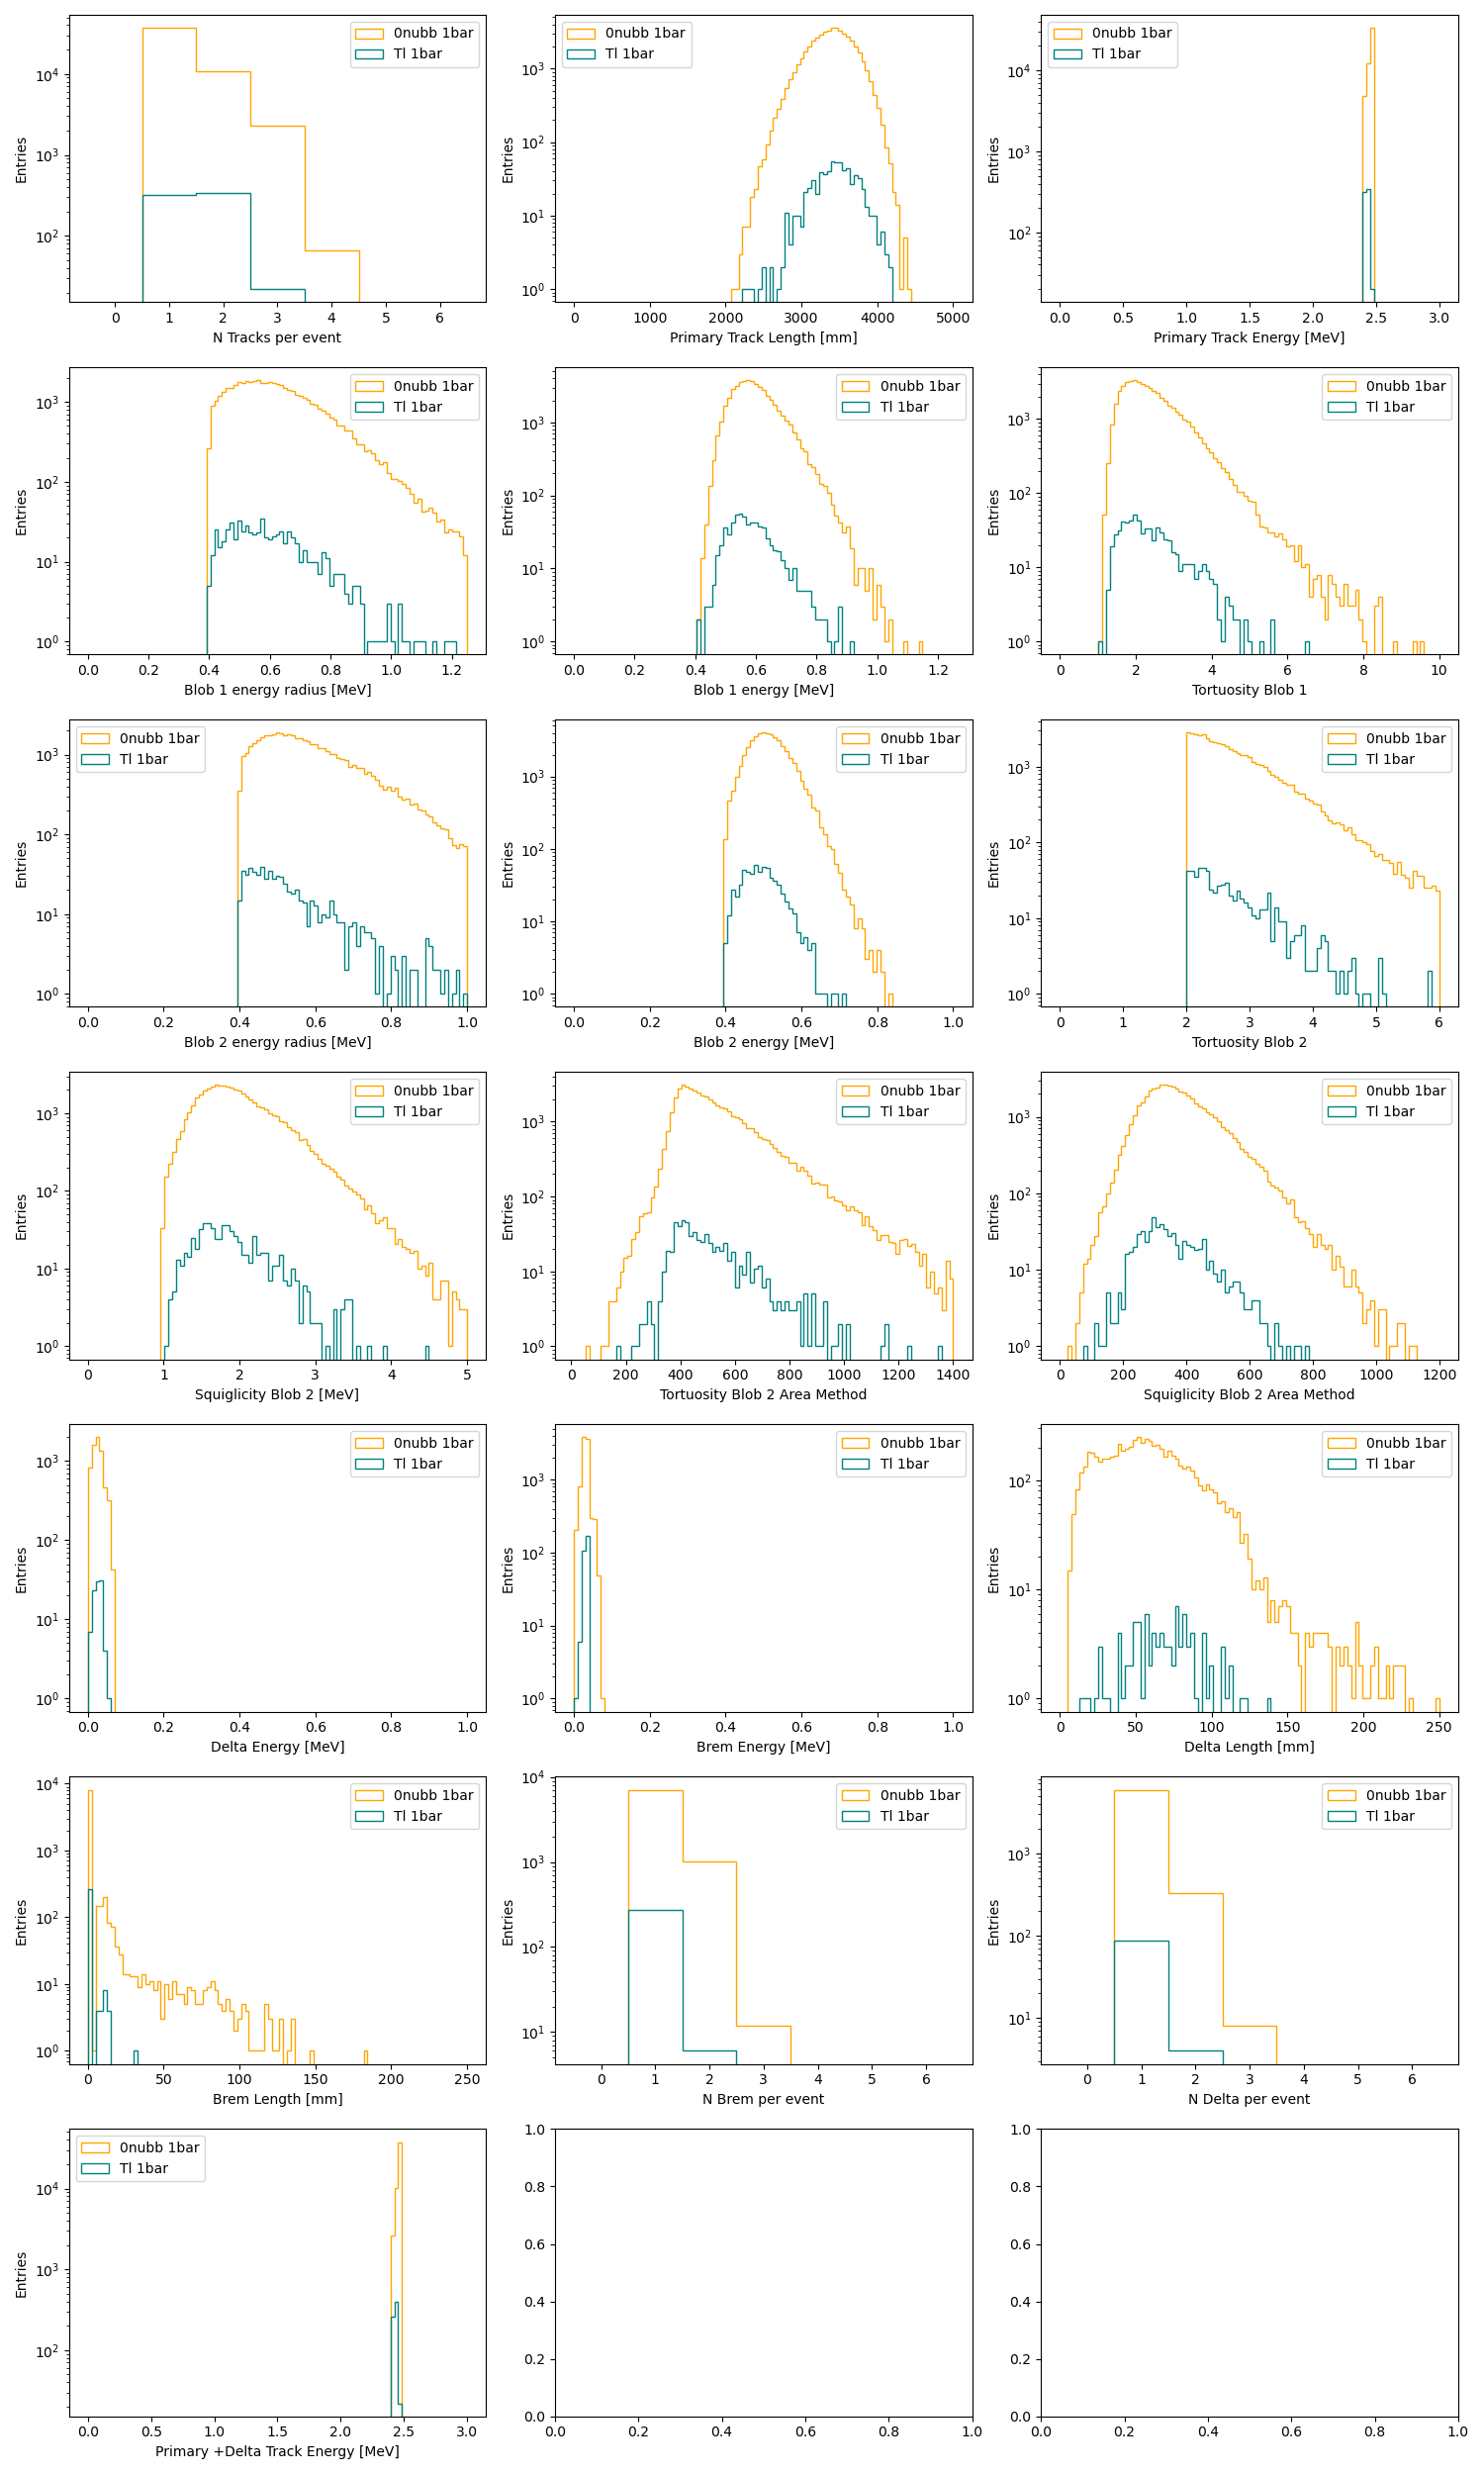

In [15]:
def FOM(eff, bkg_eff):
    return eff/np.sqrt(bkg_eff)

# Function to compute count-based ratio per event_id
def compute_ratio(group):
    # Group 1: Count of Primary + Delta*
    count_group1 = group[group["label"].str.startswith(("Primary", "Delta"))].shape[0]

    # Group 2: Count of Brem* where 0.025 < energy < 0.035 (X-rays)
    count_xrays = group[(group["label"].str.startswith("Brem")) & (group["energy"].between(0.025, 0.035))].shape[0]

    # Group 3: Count of Brem* where energy ≤ 0.025 or ≥ 0.035
    count_group3 = group[(group["label"].str.startswith("Brem")) & (~group["energy"].between(0.025, 0.035))].shape[0]

    # Compute ratio
    ratio = count_xrays / (count_group1 + count_group3)
    
    return ratio


def PlotDistributionswithCuts(df_meta, col, label, scale_factor):

    uselog=True

    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]
    
    # no diff
    # cuts = (df_primary.blob2R > 0.32) & \
    #        (df_primary.blob1R > 0.32) & \
    #        (df_primary.energy > 2.15) & \
    #        (df_primary.Squiglicity2 > 2) & \
    #        (df_primary.Tortuosity2 > 2)

    # 5 percenr
    cuts = (df_primary.blob2R > 0.4) & \
           (df_primary.blob2 > 0.4) & \
           (df_primary.blob1R > 0.4) & \
           (df_primary.energy > 2.4) & \
           (df_primary.energy < 2.5) & \
           (df_primary.Tortuosity2 > 2) & \
           (df_primary.Squiglicity2 > 1)

    df_primary = df_primary[ cuts ]

    df_meta = df_meta[(df_meta.event_id.isin(df_primary.event_id.unique()))]

    weights = np.ones_like(df_primary.energy) * scale_factor


    df_counts = GetNLongTracks(df_meta)
    df_counts_evts = df_counts[df_counts.N_tracks >= 1].event_id.unique()

    # Number of brems and deltas
    N_brem = GetNParticles(df_meta, "Brem")
    N_delta = GetNParticles(df_meta, "Delta")

    # Dataframes containing brems and deltas
    deltas = GetDeltas(df_meta)
    brems  = GetBrems(df_meta)

    # This is the sum of the primary and delta energies attached to it
    trk_e = GetTrackDeltaEnergy(df_meta)

    # Calculate the ratio of x-rays to tracks
    # x_ray_ratio = df_meta.groupby("event_id").apply(compute_ratio).reset_index(name="ratio")


    bin_edges = np.arange(-0.5, 7.5, 1)
    bin_centers = np.arange(0, 7, 1)

    # Multiplicities
    axs[0,0].hist(df_counts.N_tracks, bins = bin_edges, histtype="step", color = col, label = label);
    # axs[0,0].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[0,0].set_xlabel("N Tracks per event")
    axs[0,0].set_ylabel("Entries")
    axs[0,0].set_xticks(bin_centers) ;
    axs[0,0].legend()
    if (uselog): axs[0,0].semilogy()

    axs[0,1].hist(df_primary.length, bins = np.linspace(0, 5000, 100), histtype="step", color = col, label = label, weights = weights);
    axs[0,1].set_xlabel("Primary Track Length [mm]")
    axs[0,1].set_ylabel("Entries")
    axs[0,1].legend()
    if (uselog): axs[0,1].semilogy()

    axs[0,2].hist(df_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[0,2].set_xlabel("Primary Track Energy [MeV]")
    axs[0,2].set_ylabel("Entries")
    axs[0,2].legend()
    if (uselog): axs[0,2].semilogy()

    axs[1,1].hist(df_primary.blob1, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,1].set_xlabel("Blob 1 energy [MeV]")
    axs[1,1].set_ylabel("Entries")
    axs[1,1].legend()
    if (uselog): axs[1,1].semilogy()

    axs[2,1].hist(df_primary.blob2, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,1].set_xlabel("Blob 2 energy [MeV]")
    axs[2,1].set_ylabel("Entries")
    axs[2,1].legend()
    if (uselog): axs[2,1].semilogy()

    axs[1,0].hist(df_primary.blob1R, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,0].set_xlabel("Blob 1 energy radius [MeV]")
    axs[1,0].set_ylabel("Entries")
    axs[1,0].legend()
    if (uselog): axs[1,0].semilogy()

    axs[2,0].hist(df_primary.blob2R, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,0].set_xlabel("Blob 2 energy radius [MeV]")
    axs[2,0].set_ylabel("Entries")
    axs[2,0].legend()
    if (uselog): axs[2,0].semilogy()

    axs[1,2].hist(df_primary.Tortuosity1, bins = np.linspace(0, 10, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,2].set_xlabel("Tortuosity Blob 1")
    axs[1,2].set_ylabel("Entries")
    axs[1,2].legend()
    if (uselog): axs[1,2].semilogy()

    axs[2,2].hist(df_primary.Tortuosity2, bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,2].set_xlabel("Tortuosity Blob 2")
    axs[2,2].set_ylabel("Entries")
    axs[2,2].legend()
    if (uselog): axs[2,2].semilogy()

    axs[3,0].hist(df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,0].set_xlabel("Squiglicity Blob 2 [MeV]")
    axs[3,0].set_ylabel("Entries")
    axs[3,0].legend()
    if (uselog): axs[3,0].semilogy()

    axs[3,1].hist(df_primary.TortuosityA2, bins = np.linspace(10, 1400, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,1].set_xlabel("Tortuosity Blob 2 Area Method")
    axs[3,1].set_ylabel("Entries")
    axs[3,1].legend()
    if (uselog): axs[3,1].semilogy()

    axs[3,2].hist(df_primary.SquiglicityA2, bins = np.linspace(0, 1200, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,2].set_xlabel("Squiglicity Blob 2 Area Method")
    axs[3,2].set_ylabel("Entries")
    axs[3,2].legend()
    if (uselog): axs[3,2].semilogy()

    axs[4,0].hist(deltas.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label);
    axs[4,0].set_xlabel("Delta Energy [MeV]")
    axs[4,0].set_ylabel("Entries")
    axs[4,0].legend()
    if (uselog): axs[4,0].semilogy()

    axs[4,1].hist(brems.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label);
    axs[4,1].set_xlabel("Brem Energy [MeV]")
    axs[4,1].set_ylabel("Entries")
    axs[4,1].legend()
    if (uselog): axs[4,1].semilogy()

    axs[4,2].hist(deltas.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label);
    axs[4,2].set_xlabel("Delta Length [mm]")
    axs[4,2].set_ylabel("Entries")
    axs[4,2].legend()
    if (uselog): axs[4,2].semilogy()

    axs[5,0].hist(brems.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label);
    axs[5,0].set_xlabel("Brem Length [mm]")
    axs[5,0].set_ylabel("Entries")
    axs[5,0].semilogy()
    axs[5,0].legend()
    if (uselog): axs[5,0].semilogy()

    axs[5,1].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[5,1].set_xlabel("N Brem per event")
    axs[5,1].set_ylabel("Entries")
    axs[5,1].set_xticks(bin_centers) ;
    axs[5,1].legend()
    if (uselog): axs[5,1].semilogy()

    axs[5,2].hist(N_delta.N_Delta, bins = bin_edges, histtype="step", color = col, label = label);
    axs[5,2].set_xlabel("N Delta per event")
    axs[5,2].set_ylabel("Entries")
    axs[5,2].set_xticks(bin_centers) ;
    axs[5,2].legend()
    if (uselog): axs[5,2].semilogy()

    axs[6,0].hist(trk_e, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[6,0].set_xlabel("Primary +Delta Track Energy [MeV]")
    axs[6,0].set_ylabel("Entries")
    axs[6,0].legend()
    if (uselog): axs[6,0].semilogy()


    bin_edges = np.arange(-0.5, 3.5, 0.5)
    bin_centers = np.arange(0, 3, 0.5)

    # Multiplicities
    # axs[6,1].hist(x_ray_ratio.ratio, bins = bin_edges, histtype="step", color = col, label = label);
    # axs[6,1].set_xlabel("N x-rays per track")
    # axs[6,1].set_ylabel("Entries")
    # axs[6,1].set_xticks(bin_centers) ;
    # axs[6,1].legend()
    # if (uselog): axs[6,1].semilogy()



    plt.tight_layout()

    return df_primary.event_id.unique()



fig, axs = plt.subplots(7, 3, figsize=(15, 25))

nubb_cut = PlotDistributionswithCuts(nubb_meta, "orange", "0nubb 1bar", 1)
Tl_cut = PlotDistributionswithCuts(Tl_meta, "Teal", "Tl 1bar", 1)

nubb_cut_num = len(nubb_cut)
Tl_cut_num = len(Tl_cut)


print("nubb: ", nubb_events, nubb_cut_num, 100*nubb_cut_num/nubb_events)
print("Tl: ", Tl_events, Tl_cut_num, 100-100*Tl_cut_num/Tl_events)
print("FOM:", FOM(nubb_cut_num/nubb_events, Tl_cut_num/Tl_events))


# To plot:
# Get the number of x-rays in the event and plot that vs the number of tracks in the event. gammas should have a 1 to 1 correspondance, whereas signal should be reduced.
# tracking algo: new function to group clusters and then only connect based on the grouped clusters. This clustering should first be binned then labelled based on the proximity.  
# add x-ray label to the label tree other than brem


675
{0: [2, 1], 2: [0, 4], 4: [2, 3], 3: [4, 5], 5: [3, 12], 6: [26, 1], 26: [6, 31], 7: [8, 10], 8: [7, 9], 9: [8, 11], 10: [7, 15], 11: [9, 21], 12: [13, 5], 13: [12, 18], 18: [13, 24], 14: [21, 25], 21: [14, 11], 15: [30, 10], 30: [15, 33], 16: [19, 24], 19: [16, 17], 17: [25, 19], 25: [17, 14], 20: [23, 27], 23: [20, 22], 22: [28, 23], 28: [22, 29], 24: [18, 16], 31: [26, 34], 27: [20, 36], 29: [28, 32], 33: [30, 35], 34: [31, 37], 32: [35, 29], 35: [32, 33], 36: [38, 27], 38: [36, 61], 37: [34, 47], 39: [46, 55], 46: [39, 52], 40: [44, 43], 44: [40, 53], 42: [47, 55], 47: [42, 37], 43: [40, 45], 45: [43, 49], 48: [56, 41], 56: [48, 67], 49: [45, 54], 50: [58, 41], 58: [50, 64], 51: [60, 57], 60: [51, 63], 52: [57, 46], 57: [52, 51], 53: [59, 44], 59: [53, 66], 54: [62, 49], 62: [54, 65], 55: [42, 39], 64: [58, 70], 66: [59, 73], 61: [69, 38], 69: [61, 71], 63: [60], 65: [62, 68], 67: [72, 56], 72: [67, 75], 68: [70, 65], 70: [68, 64], 71: [69, 75], 73: [74, 66], 74: [73, 76], 75: 

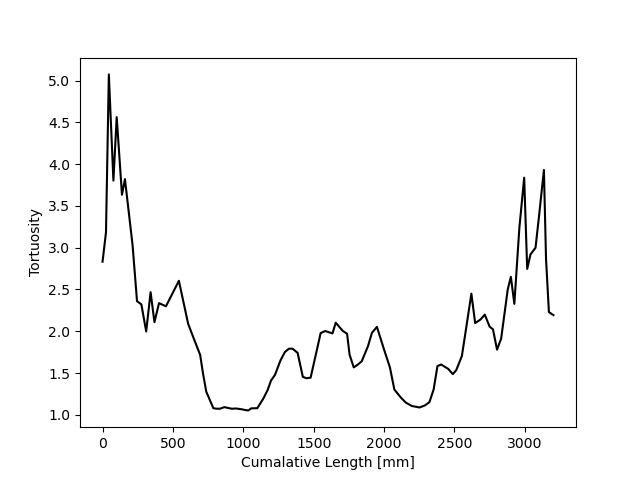

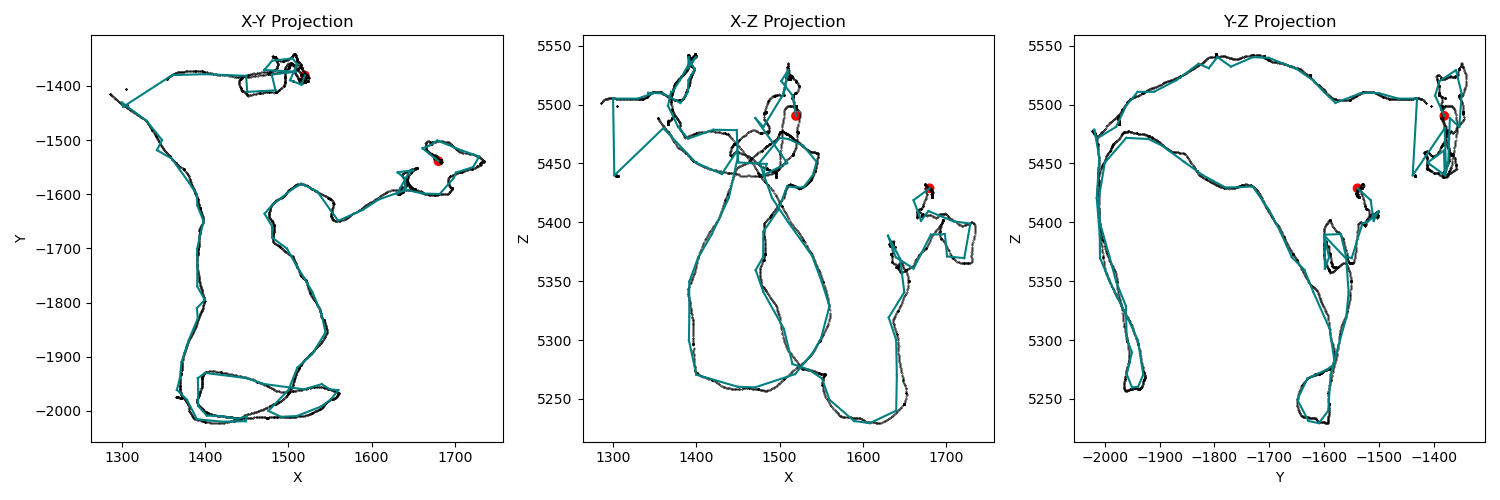

In [115]:
# 3D event display
%matplotlib widget



print(len(Tl_cut))


# evid = 26984036
evid= Tl_cut[19]

event = Tl[Tl.event_id == evid]
event.index = event.id
Track = Tracks_Tl[evid]
connection = connections_Tl[evid]
connection_count = connection_counts_Tl[evid]
event_hits_true = Tl_true_hits[Tl_true_hits.event_id == evid]
event_parts_true = Tl_true_parts[Tl_true_parts.event_id == evid]


# evid=nubb_topology_evts[8]
# event = nubb[nubb.event_id == evid]
# display(event)
# event.index = event.id
# Track = Tracks_nubb[evid]
# connection = connections_nubb[evid]
# connection_count = connection_counts_nubb[evid]

print(connection)

plt.figure()

# plt.hist2d(event.cumulative_distance, event.angle, bins = 20,cmin=3);
plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k");

plt.xlabel("Cumalative Length [mm]")
plt.ylabel("Tortuosity")

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)
axs[0].scatter(event_hits_true['x'], event_hits_true['y'], marker='o',c="k", s=0.1)

# Plot xz projection
plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)
axs[1].scatter(event_hits_true['x'], event_hits_true['z'], marker='o',c="k", s=0.1)

# Plot yz projection
plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)
axs[2].scatter(event_hits_true['y'], event_hits_true['z'], marker='o',c="k", s=0.1)

plt.tight_layout()



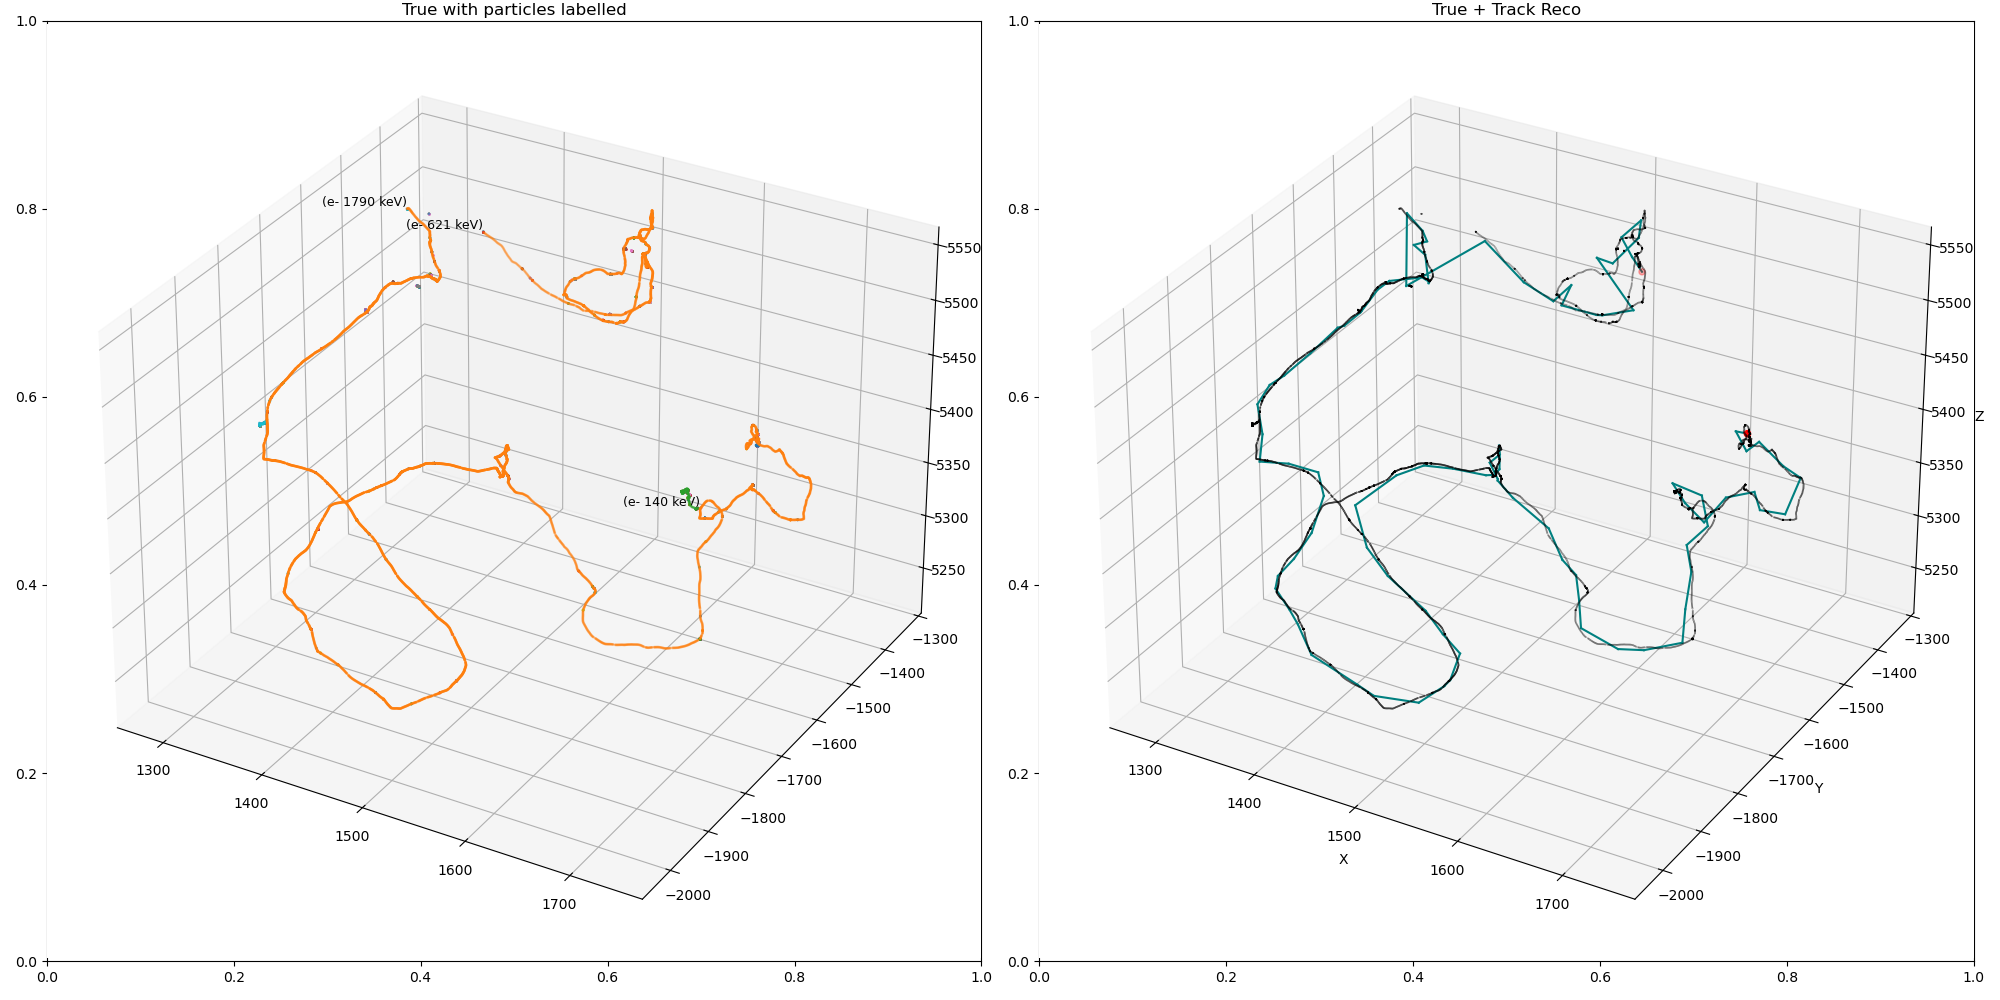

In [116]:
# 3D Projection
# plt.figure()
# Create two side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# --- First plot: 3D Projection ---
ax_3D = fig.add_subplot(121, projection='3d')
for p in event_hits_true.particle_id.unique():
    ax_3D.scatter(event_hits_true[event_hits_true.particle_id == p]['x'], 
                  event_hits_true[event_hits_true.particle_id == p]['y'], 
                  event_hits_true[event_hits_true.particle_id == p]['z'], 
                  marker='o', s=1)

for index, row in event_parts_true[event_parts_true.kin_energy > 0.1].iterrows():
    Energy = round(row["kin_energy"] * 1000)
    particle_name = row["particle_name"]

    if particle_name == "gamma":
        continue

    ax_3D.text(row["initial_x"], row["initial_y"], row["initial_z"] + 3000, 
               f"({particle_name} {Energy} keV)", fontsize=9, ha='right', va='bottom', color='black')


ax_3D.set_title("True with particles labelled")

# --- Second plot: Example scatter plot ---
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(event_hits_true['x'], event_hits_true['y'], event_hits_true['z'],c="k", s=0.1)
plot_tracks_3D(ax2, event['x'], event['y'], event['z'], connection_count, Track)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_title("True + Track Reco")

plt.tight_layout()
plt.show()

In [102]:
display(event_parts_true[event_parts_true.kin_energy>0.1])

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
11620,59100016,1,gamma,1,0,-480.376495,2503.422119,-2000.035767,0.000000,1481.061890,...,0.946692,-1.986460,1.070308,-0.0,-0.0,-0.0,2.447000,5086.824707,none,phot
11630,59100016,8,e-,0,1,1481.061890,-1624.300293,217.638260,16.967821,1494.995728,...,0.035854,-0.098685,-0.791894,-0.0,0.0,-0.0,0.437284,404.154541,phot,eIoni
11799,59100016,2,e-,0,1,1484.921509,-1620.398682,221.885895,16.944672,1093.482178,...,1.186729,-1.734078,1.291637,0.0,0.0,0.0,2.007890,2783.510254,compt,eIoni
12216,59100016,194,e-,0,2,1705.326904,-1816.961792,331.610718,18.144386,1698.160034,...,0.202442,0.313258,0.357484,-0.0,-0.0,-0.0,0.215656,133.393509,eIoni,eIoni


In [ ]:
# Save all the background events




# for i, evid in enumerate(Tl_topology_evts):
#     event = Tl[Tl.event_id == evid]
#     event.index = event.id
#     Track = Tracks_Tl[evid]
#     connection = connections_Tl[evid]
#     connection_count = connection_counts_Tl[evid]

#     # Tortuosity plot
#     plt.figure()
#     plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k")
#     plt.xlabel("Cumulative Length [mm]")
#     plt.ylabel("Tortuosity")
#     plt.title(f"Event {evid}")
#     plt.savefig(f"plots/Dave/SelectedBkg/Background_Evt{evid}_Tortuosity.pdf")

#     if i == 0:
#         plt.show()  # Show only the first figure
#     else:
#         plt.close()  # Close the figure to avoid displaying

#     # Create subplots for 3D projections
#     fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#     # Plot projections
#     plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)
#     plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)
#     plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)

#     fig.suptitle(f"Event {evid}")

#     plt.tight_layout()
#     plt.savefig(f"plots/Dave/SelectedBkg/Background_Evt{evid}.pdf")
    
#     plt.close(fig)  # Close the figure after saving to prevent display


# def SaveInteractive3D(event_hits, filename):
#     fig = px.scatter_3d(event_hits, x='x', y='y', z='z', color='energy',
#                          title="3D Event Display", color_continuous_scale="Spectral")
    
#     fig.update_layout(scene=dict(
#         xaxis_title="X [mm]",
#         yaxis_title="Y [mm]",
#         zaxis_title="Z [mm]",
#         bgcolor='black',
#         xaxis=dict(
#             showbackground=False,  # Remove X plane
#             showgrid=False,
#             zeroline=False
#         ),
#         yaxis=dict(
#             showbackground=False,  # Remove Y plane
#             showgrid=False,
#             zeroline=False
#         ),
#         zaxis=dict(
#             showbackground=False,  # Remove Z plane
#             showgrid=False,
#             zeroline=False
#         ),
#     ))

#     pio.write_html(fig, filename)  # Save as interactive HTML file

# for i, evid in enumerate(Tl_topology_evts):
#     event = Tl[Tl.event_id == evid]

#     SaveInteractive3D(event, f"plots/Dave/SelectedBkg/Background_Evt{evid}_3D.html")

